<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Analysis

Datasets :

Data Preprocessing:

Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

Use multiple visualizations to understand the hidden patterns in the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name = "data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
print("Total Number of rows in datset :",str(len(df)))

Total Number of rows in datset : 3999


**Null** Value

In [ ]:
print(df.isnull().sum())
print("No Null Value in the Dataset")

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
No Null Value in the Dataset


Remove Outlier: Using boxplot

Original shape : (3999, 12)
After removing outliers : (2431, 12)


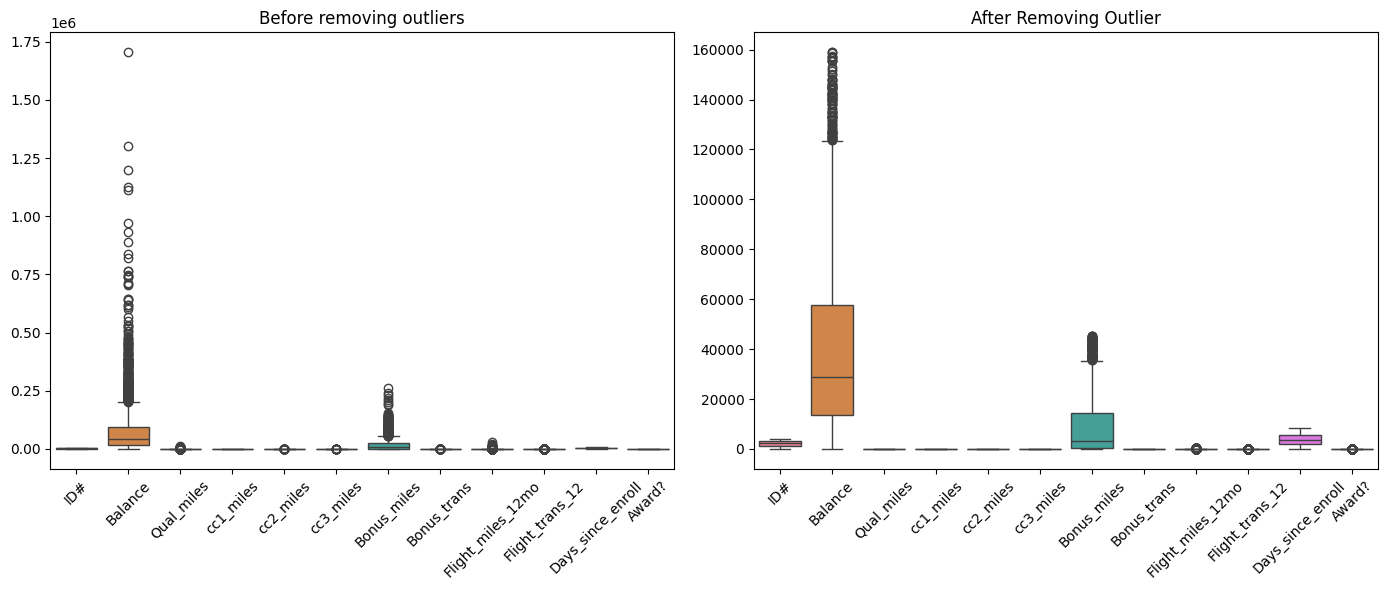

In [ ]:

numeric_col = df.select_dtypes(include=[float,int]).columns

# compure Q1 and Q3 and IQR
Q1 = df[numeric_col].quantile(0.30)
Q3 = df[numeric_col].quantile(0.70)
IQR = Q3-Q1

# remove outlier
df_no_outlier = df[~((df[numeric_col] < (Q1 - 1.5*IQR)) |
                     (df[numeric_col] > (Q3 + 1.5*IQR))).any(axis=1)]
print("Original shape :", df.shape)
print("After removing outliers :", df_no_outlier.shape)

# boxplot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data = df[numeric_col])
plt.title("Before removing outliers")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data=df_no_outlier[numeric_col])
plt.title("After Removing Outlier")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Feature Scelling

Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

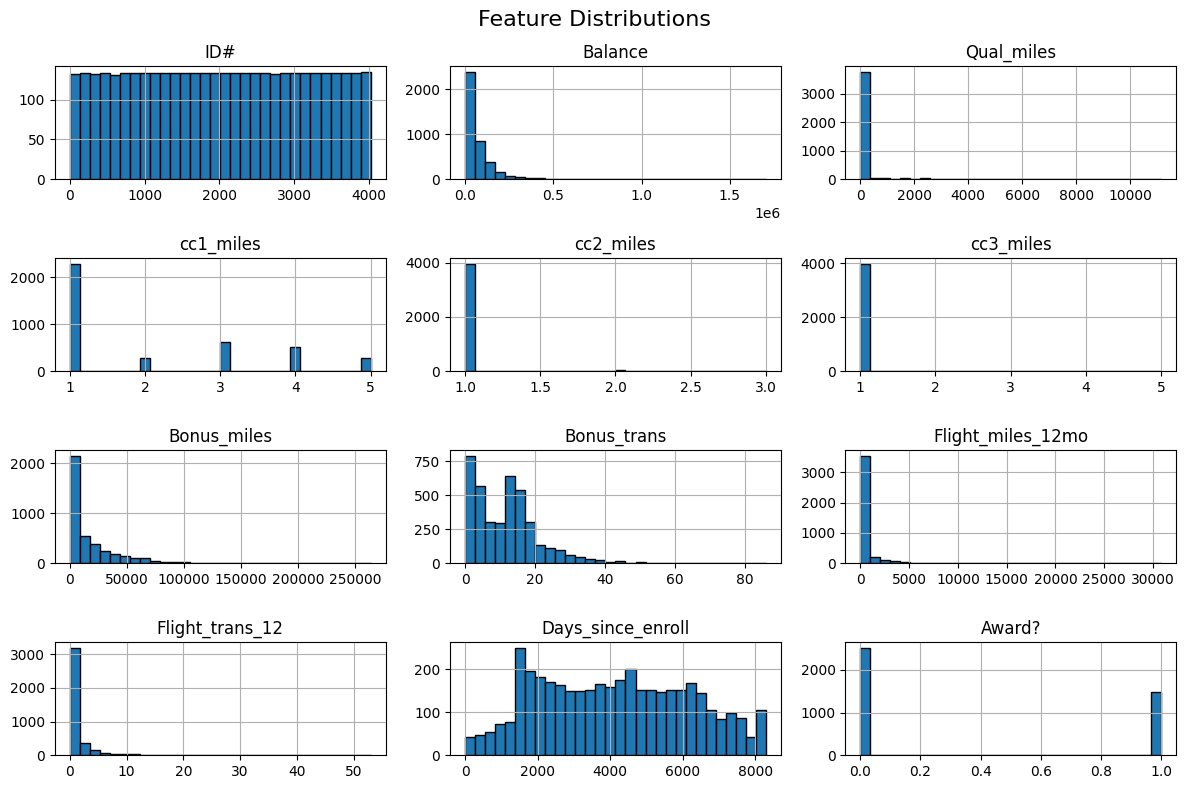

In [ ]:
#histogram
df.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

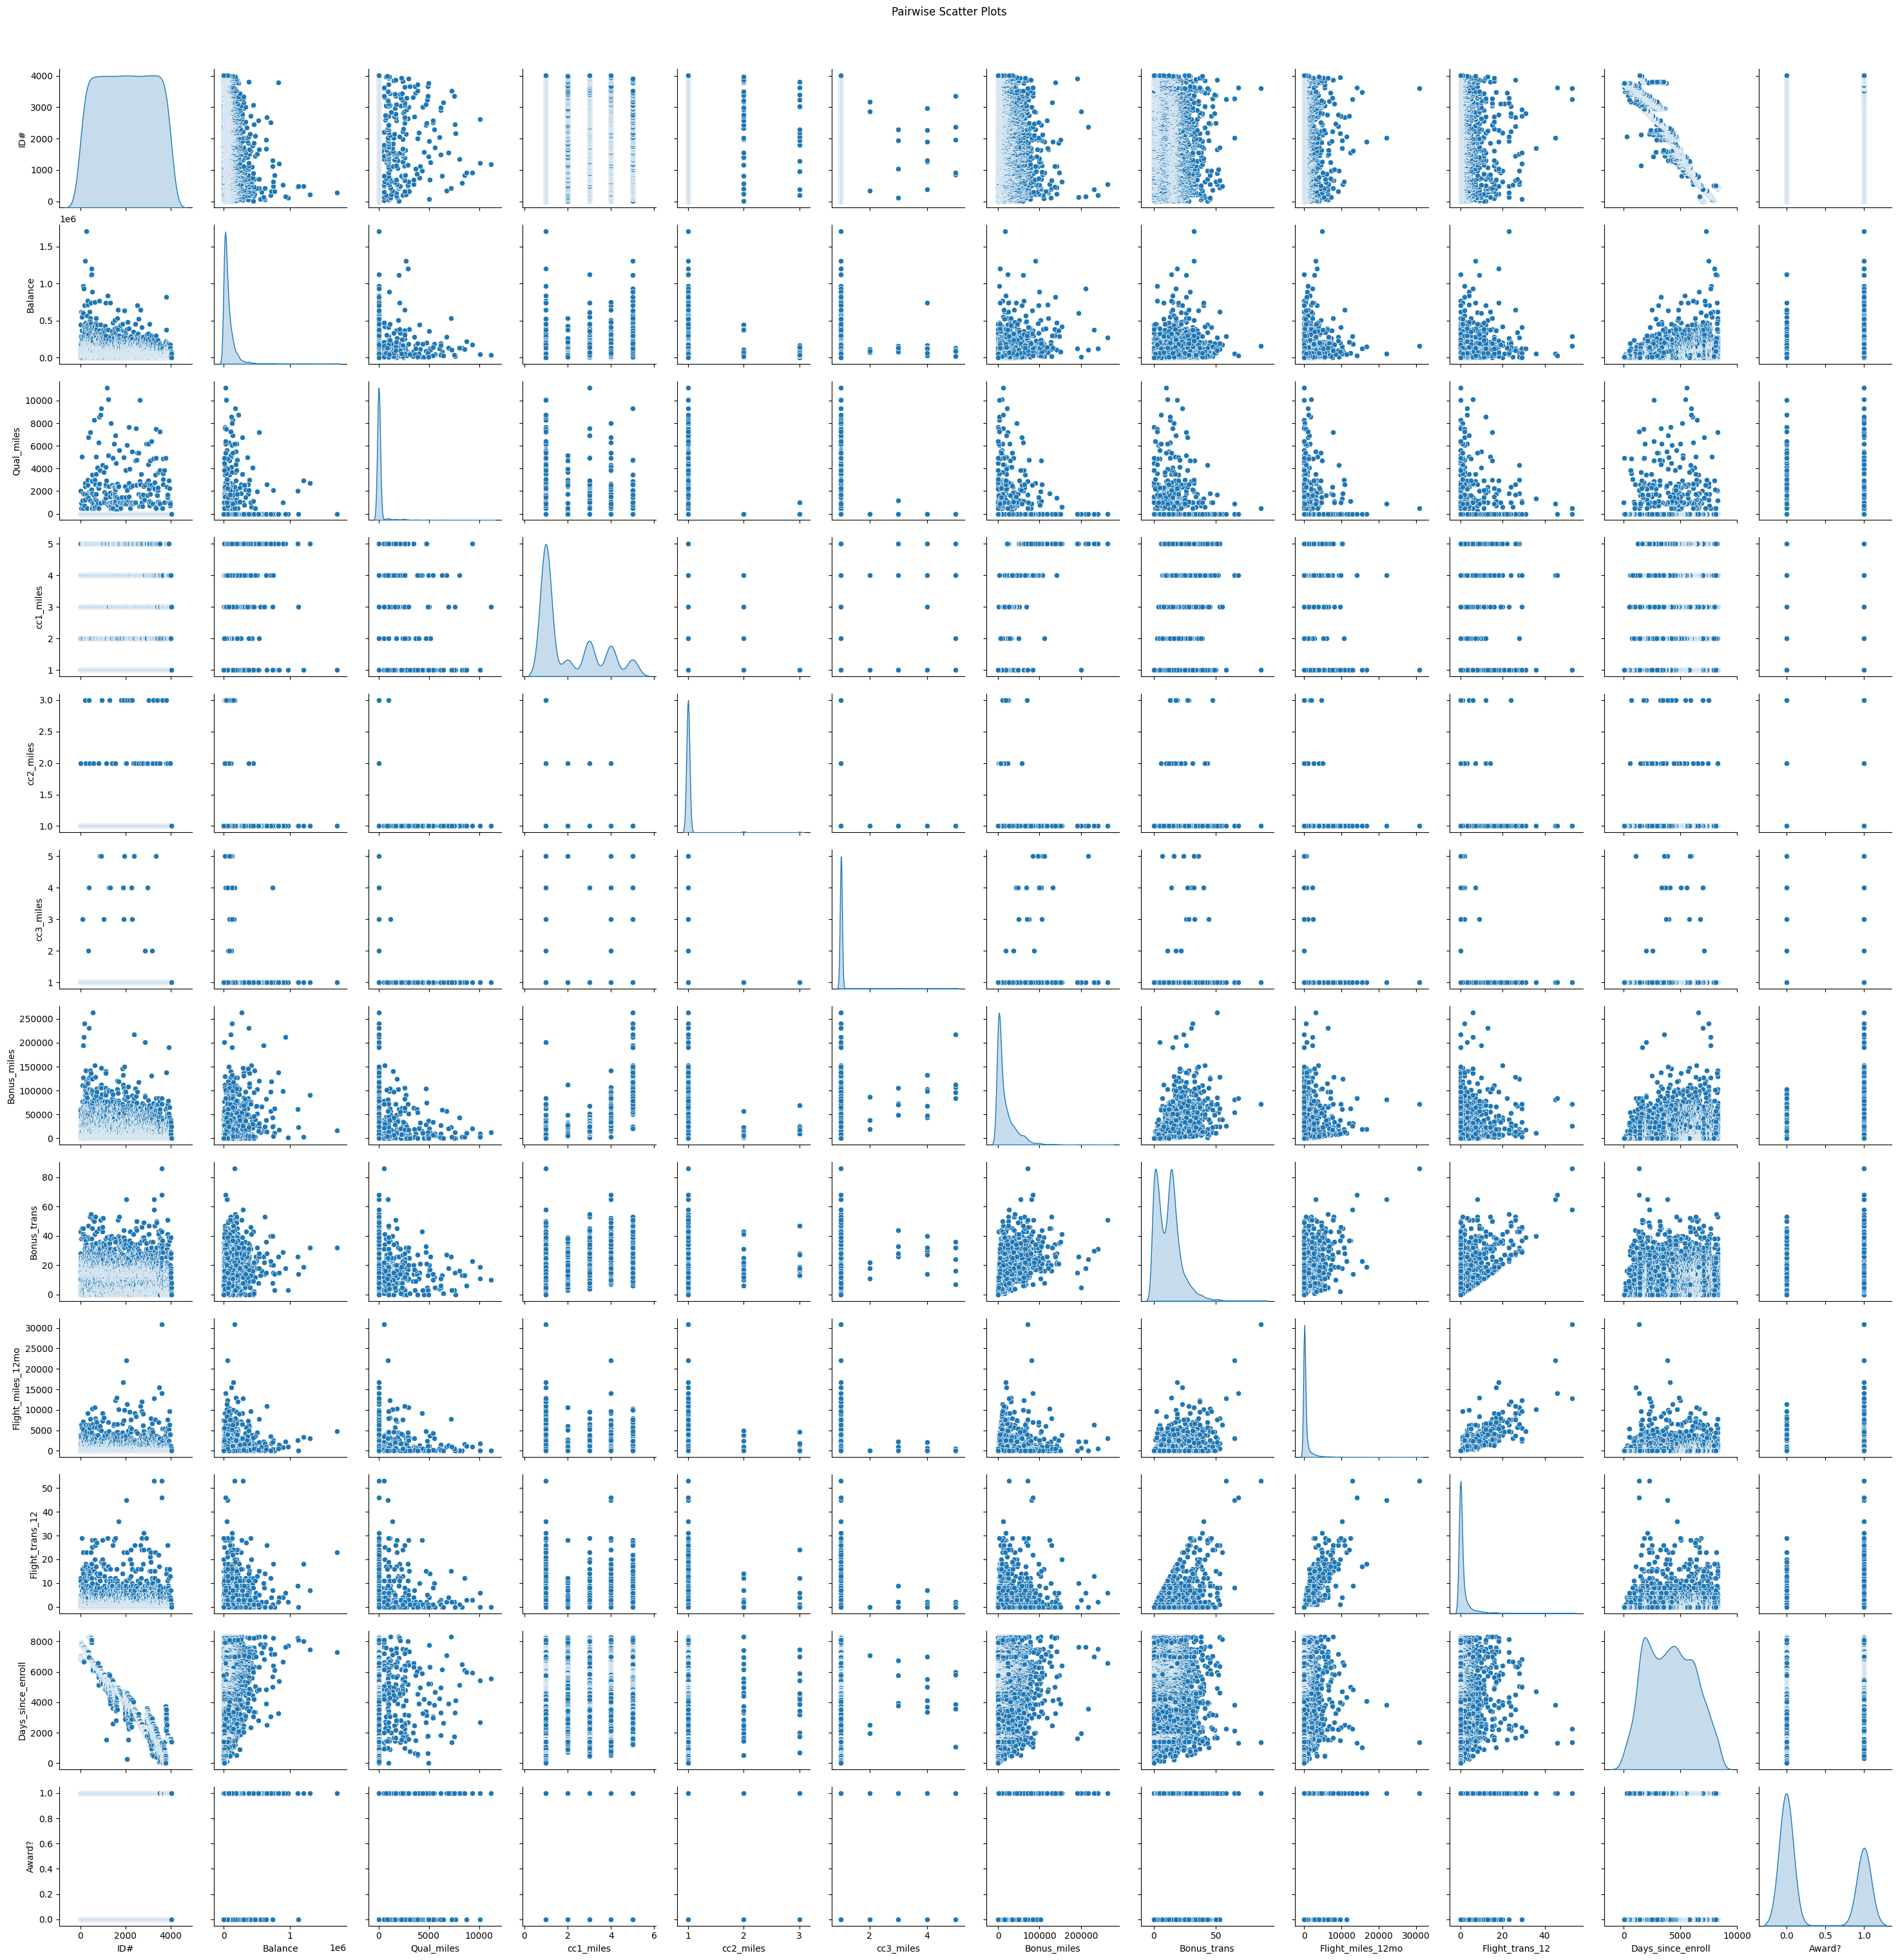

In [ ]:
# Scatter plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

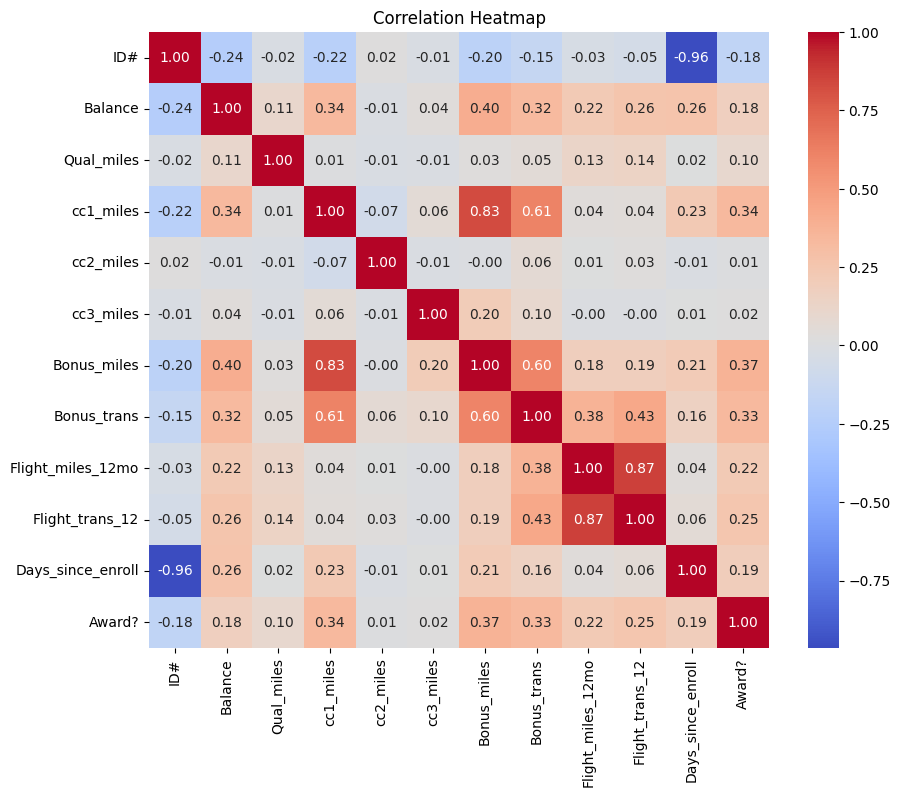

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#feature Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])),
                         columns=df.select_dtypes(include=[np.number]).columns)




Implementing Clustering Algorithms:

Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

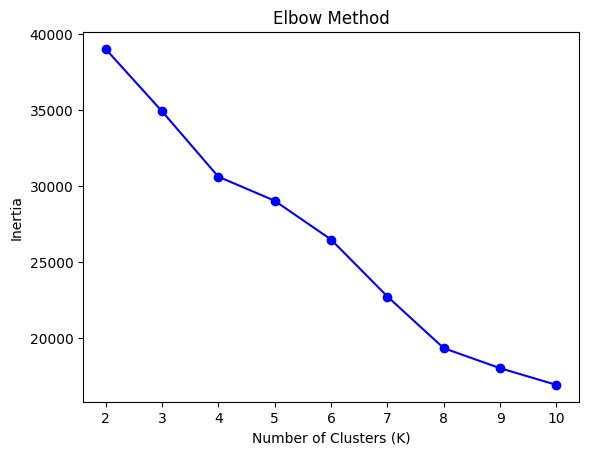

In [ ]:
#Elbow Method to Choose K
from sklearn.cluster import KMeans
inertia = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#Fit K-Means with Optimal K
k_optimal = 3  # choose based on elbow curve
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

df['KMeans_Cluster'] = kmeans_labels


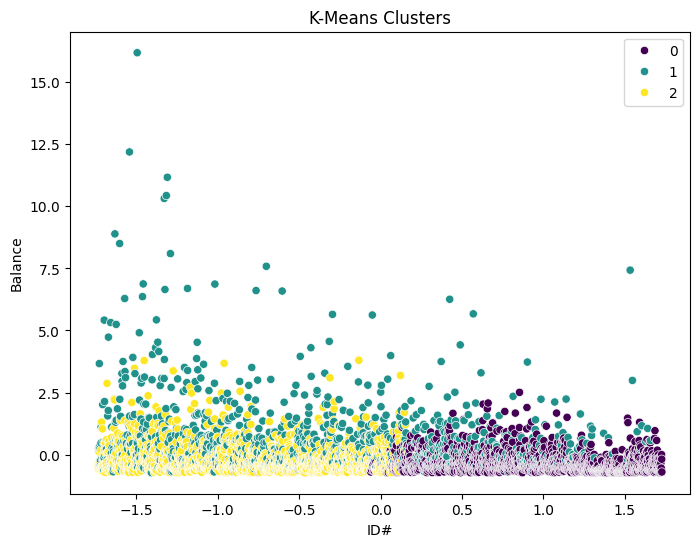

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data.iloc[:,0], y=scaled_data.iloc[:,1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
#Silhouette Score
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)


K-Means Silhouette Score: 0.201891717665419


Hierarchical Clustering

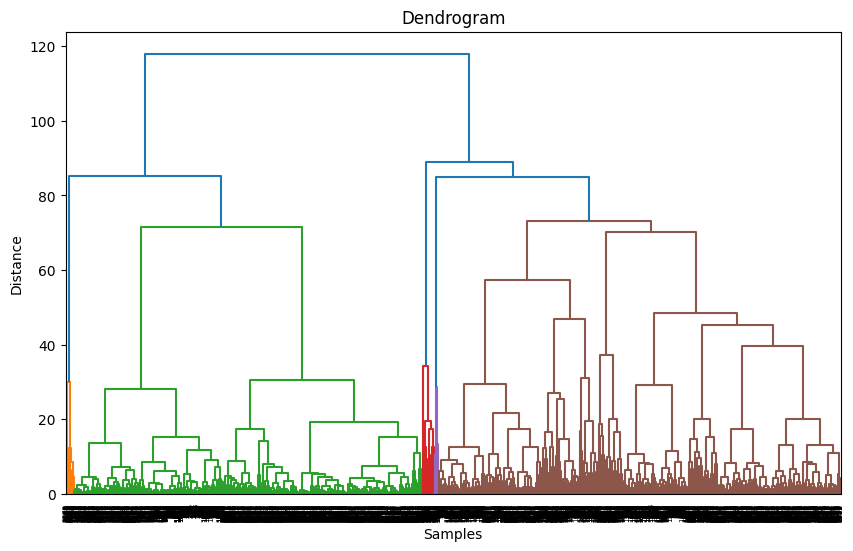

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
#Dendrogram to Find Optimal Clusters
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

df['Hierarchical_Cluster'] = hc_labels

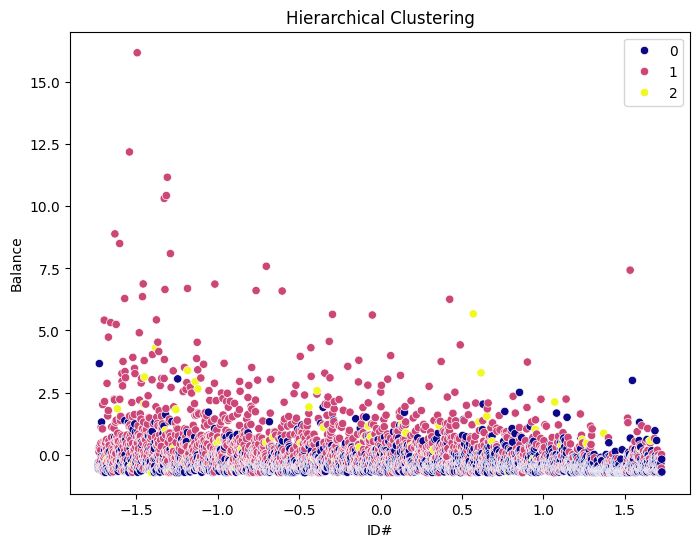

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data.iloc[:,0], y=scaled_data.iloc[:,1], hue=hc_labels, palette='plasma')
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
silhouette_hc = silhouette_score(scaled_data, hc_labels)
print("Hierarchical Clustering Silhouette Score:", silhouette_hc)

Hierarchical Clustering Silhouette Score: 0.20526614352218822


DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

df['DBSCAN_Cluster'] = dbscan_labels

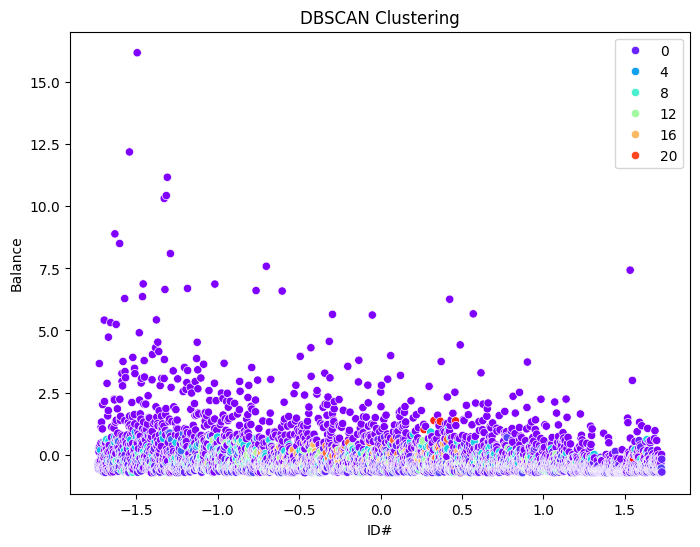

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data.iloc[:,0], y=scaled_data.iloc[:,1], hue=dbscan_labels, palette='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
#Silhouette Score
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1 and sum(mask) > 0:
    silhouette_dbscan = silhouette_score(scaled_data[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", silhouette_dbscan)
else:
    print("DBSCAN did not form valid clusters for silhouette score.")

DBSCAN Silhouette Score: -0.10765271486979784


Cluster Analysis and Interpretation:

Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.



In [ ]:
#Cluster Analysis & Insights
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('Hierarchical_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())


                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               3111.388308   40980.913231  105.005538   1.444308   1.016615   
1               1533.872934  150218.949380  297.365702   3.833678   1.007231   
2               1078.568990   58553.187767   83.805121   1.549075   1.017070   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.001846   6917.616000     8.138462         237.179692   
1                1.046488  48249.512397    21.637397        1197.568182   
2                1.000711   7550.203414     8.695590         209.886202   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      0.691077        2196.562462  0.225231   
1                      3.589876

Cluster Analysis and Interpretation:

K-Means: Provides well-separated spherical clusters; silhouette score indicates cohesion and separation.

Hierarchical: Useful to visualize cluster relationships; can be cut at different levels for number of clusters.

DBSCAN: Detects arbitrary-shaped clusters and noise points; useful for datasets with outliers.

Evaluation and Performance Metrics:

Silhouette Score: Measures how similar a point is to its own cluster vs other clusters.

Range: -1 to 1, higher is better.

K-Means and Hierarchical: Good for spherical clusters, sensitive to scaling.

DBSCAN: Handles noise/outliers well, but requires parameter tuning.